In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from matplotlib import pyplot as plt
import seaborn as sns
# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

Для начала считываем данные о дифференциальной экспрессии генов в мозге мышей:

In [2]:
scaledcounts = pd.read_csv("C:/Users/57662/Downloads/brain_counts.csv")

In [3]:
scaledcounts.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,0,125,0,1,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


Для определения числа кластеров воспользуемся elbow методом: Обучаем модели кластеризации k средних для разного количества кластеров и строим зависимость суммы квадратов расстояний от каждого элемента кластера до соответствующего центроида от колличества кластеров и находим точку изгиба графика, при этом колонку с кодовым именем нужно убрать - она не задает координату вектора.

In [4]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(scaledcounts.drop(['Unnamed: 0'], axis=1))
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [5]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,2.750228e+14
1,2,1.372840e+14
2,3,8.235789e+13
3,4,5.845748e+13
4,5,4.646593e+13
5,6,4.024113e+13
6,7,3.645603e+13
7,8,3.344320e+13
8,9,3.106247e+13
9,10,2.910916e+13


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

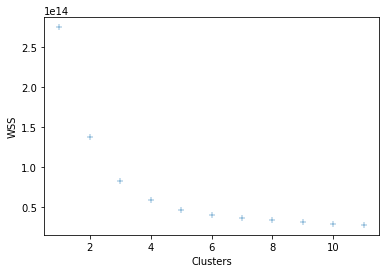

In [6]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

Четкого угла на гравфике не видно, но для начала можно взять n_clusters = 7.

In [51]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_clusters in range(3,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaledcounts.drop(['Unnamed: 0'], axis=1))
    centers = clusterer.cluster_centers_

    score = silhouette_score(scaledcounts.drop(['Unnamed: 0'], axis=1), preds)
    silhouette_scores.append(score)

In [53]:
Clusters_score = pd.DataFrame({'Clusters' : range(3,10), 'silhouette_scores' : silhouette_scores})
Clusters_score

,Clusters,silhouette_scores
0,3,0.700723
1,4,0.578845
2,5,0.504330
3,6,0.437675
4,7,0.379674
5,8,0.368683
6,9,0.361607


<AxesSubplot:xlabel='Clusters', ylabel='silhouette_scores'>

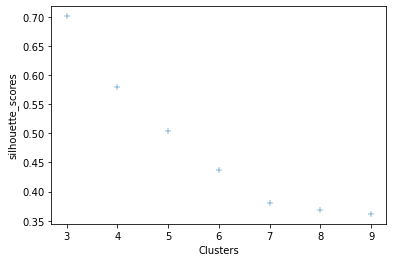

In [54]:
sns.scatterplot(x = 'Clusters', y = 'silhouette_scores', data = Clusters_score, marker="+")

In [7]:
km = KMeans(n_clusters = 7)
y_predict = km.fit_predict(scaledcounts.drop(['Unnamed: 0'], axis=1))
scaledcounts['cluster'] = y_predict
scaledcounts.head()

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cluster
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,0,0
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,0,195,0,0,113,0,4
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,0,125,0,1,0,0,0,0
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,0,81,0,0,0,0,0,0,4


Попробуем визуализовать результать с помощью метода понижения размерности (Principal Component Analysis):

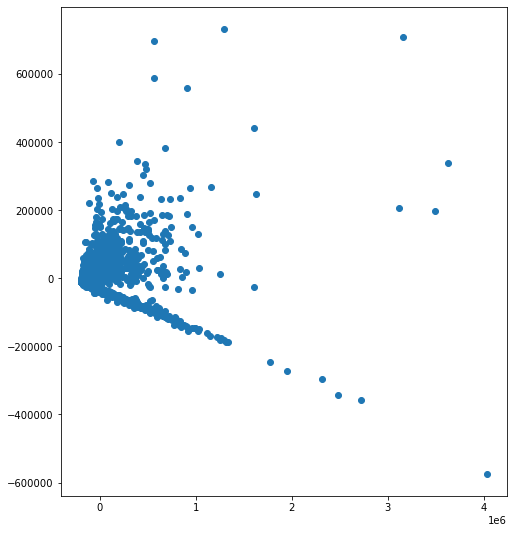

In [8]:
pca = PCA(n_components = 2)
pca.fit(scaledcounts.drop(['Unnamed: 0'], axis=1))
pca.explained_variance_ratio_
x_pca = pca.transform(scaledcounts.drop(['Unnamed: 0'], axis=1))
plt.figure(figsize=(8,9))
plt.scatter(x_pca[:,0],x_pca[:,1],)

Видно, что определить колличество кластеров без elbow метода было невозможно даже примерно. Тепрерь нужно покрасить точки и посмотреть, разделились ли точки по цвету

Добавляем столбец номеров кластеров к столбцам PC1 и PC2:

In [9]:
import numpy as np
np.insert(x_pca,2,y_predict,axis=1)

array([[-1.77407919e+05, -1.26224805e+04,  0.00000000e+00],
       [-1.57844598e+05, -1.87540143e+04,  0.00000000e+00],
       [ 1.60008048e+04,  8.16227401e+04,  4.00000000e+00],
       ...,
       [-1.73973674e+05, -1.33934616e+04,  0.00000000e+00],
       [-3.79441358e+04,  1.48549154e+04,  4.00000000e+00],
       [-1.78065952e+05, -1.30685856e+04,  0.00000000e+00]])

Преобразуем в более удобный дата фрейм:

In [10]:
df = pd.DataFrame(np.insert(x_pca,2,y_predict,axis=1)).rename(columns={2:'cluster'})
df

,0,1,cluster
0,-177407.918590,-12622.480524,0.0
1,-157844.597528,-18754.014284,0.0
2,16000.804822,81622.740098,4.0
3,-131256.837643,-18220.629936,0.0
4,-71464.649824,-25776.032993,4.0
...,...,...,...
3396,-93902.057099,-21945.110509,0.0
3397,-119573.873556,-6535.428476,0.0
3398,-173973.674045,-13393.461569,0.0
3399,-37944.135805,14854.915438,4.0


Рисуем раскрашенные точки

<Figure size 576x648 with 0 Axes>

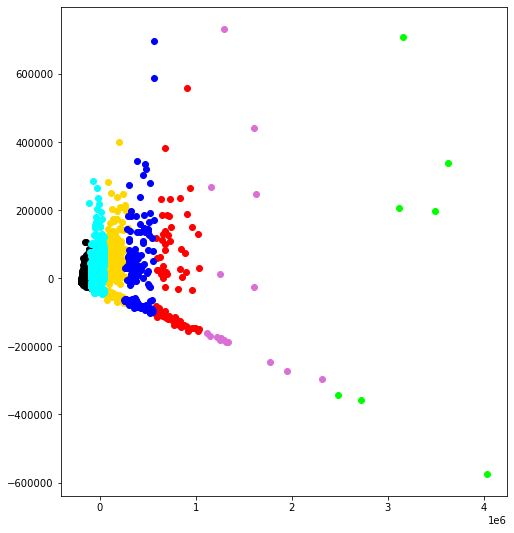

In [11]:
plt.figure(figsize=(8,9))
colors = ['black','red', 'gold', 'lime', 'cyan', 'orchid', 'b']

plt.figure(figsize=(8,9))
for i in range(7):
    sub_df = df.loc[df['cluster'] == i]
    plt.scatter(sub_df[0],sub_df[1], c = colors[i])

In [12]:
Видно разделение точек по кластерам, разброс голубых и красных точек может быть побочным эффектом понижения размерности данных.

SyntaxError: invalid syntax (Temp/ipykernel_58480/3354281679.py, line 1)

In [13]:
from sklearn.cluster import DBSCAN

In [40]:
clustering = DBSCAN(eps=10000, min_samples=10).fit(scaledcounts.drop(['Unnamed: 0'], axis=1))

In [41]:
scaledcounts['cluster_hdbscan'] = clustering.labels_
scaledcounts.head(50)

,Unnamed: 0,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,...,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,cluster,cluster_hdbscan
0,A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,...,0,0,0,0,0,0,54,0,0,-1
1,A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,...,0,0,0,195,0,0,113,0,4,-1
3,A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,...,0,0,125,0,1,0,0,0,0,-1
4,A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,...,0,81,0,0,0,0,0,0,4,-1
5,A1.MAA000930.3_8_M.1.1,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,4,-1
6,A1.MAA000932.3_11_M.1.1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7,A1.MAA000940.3_8_M.1.1,0,16,0,0,2,1,0,0,0,...,0,3,0,0,0,0,13,0,0,0
8,A1.MAA001854.3_38_F.1.1,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
9,A1.MAA001894.3_39_F.1.1,0,33,3,0,0,0,0,0,0,...,0,0,0,47,0,0,27,0,0,0


array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [55]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])# this returns a tuple of (cell_qc_dataframe, gene_qc_dataframe)
                                 # ask for the percentage of reads from spike ins
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

NameError: name 'sc' is not defined

In [ ]:
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')
# plt.xlim(0,1e6) # Try plotting with and without scaling the x-axis. When is this helpful?

In [65]:
import scipy.stats as stats
counts_zscored = scaledcounts.drop(['Unnamed: 0','cluster','cluster_hdbscan'], axis=1).apply(lambda x: np.log(x+1))
counts_zscored.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,0.0,4.836282,2.833213,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.007333,0.0
1,0.0,0.000000,0.000000,0.0,0.0,5.783825,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,5.855072,0.000000,0.0,0.0,1.791759,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,5.278115,0.000000,0.0,4.736198,0.0
3,0.0,3.737670,3.610918,0.0,0.0,3.218876,0.0,0.0,0.0,2.70805,...,0.0,0.0,0.0,0.000000,4.836282,0.000000,0.693147,0.0,0.000000,0.0
4,0.0,3.988984,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,4.406719,0.000000,0.000000,0.000000,0.0,0.000000,0.0


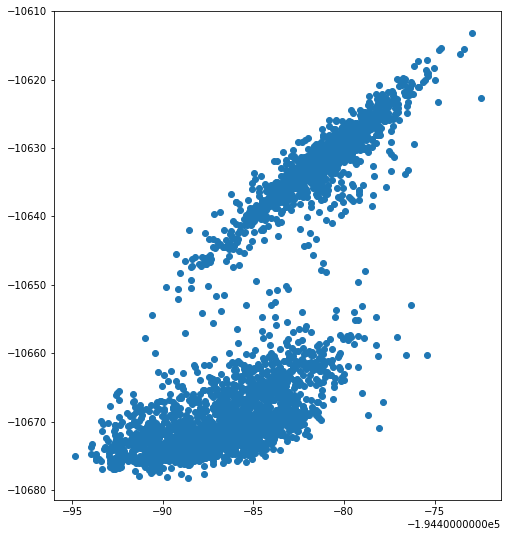

In [67]:
pca = PCA(n_components = 2)
pca.fit(scaledcounts.drop(['Unnamed: 0','cluster','cluster_hdbscan'], axis=1))
pca.explained_variance_ratio_
x_pca = pca.transform(counts_zscored)
plt.figure(figsize=(8,9))
plt.scatter(x_pca[:,0],x_pca[:,1],)

In [ ]:
#normalization

In [77]:
data = scaledcounts.drop(['Unnamed: 0','cluster','cluster_hdbscan'], axis=1)
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
0,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
3,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
4,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0


In [101]:
A = np.array(data.sum(axis =1)/1000000)
len(A)

3401

In [102]:
A @ np.array(data)

array([8.69423756e+02, 1.45897425e+06, 2.61803156e+05, ...,
       9.76889670e+01, 4.53228835e+05, 0.00000000e+00])